#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#### Reading datasets

In [2]:
df1 = pd.read_csv("Veriseti1.txt")
df2 = pd.read_csv("Veriseti2.txt")
df3 = pd.read_csv("Veriseti3.txt")

#### Datasets preview

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [6]:
v_df = pd.concat([df1,df2,df3])
df = pd.concat([df1,df2])
v_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
v_df.isnull().values.any()

False

In [8]:
v_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,20560.0,20.906212,1.055315,19.000000,20.200000,20.700000,21.525000,24.408333
Humidity,20560.0,27.655925,4.982154,16.745000,24.500000,27.290000,31.290000,39.500000
Light,20560.0,130.756622,210.430875,0.000000,0.000000,0.000000,301.000000,1697.250000
CO2,20560.0,690.553276,311.201281,412.750000,460.000000,565.416667,804.666667,2076.500000
HumidityRatio,20560.0,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,0.231031,0.421503,0.000000,0.000000,0.000000,0.000000,1.000000


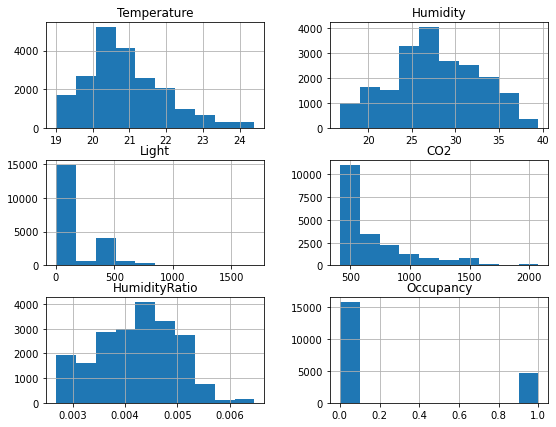

In [9]:
v_df.hist(figsize=(9,7));

#### Verisetlerine veriseti içerisindeki "date" parametresinden "Hour" adında belirtilen durumun günün hangi saatlerinde meydana geldiğini gösteren yeni bir değişken oluşturuldu 
#### "Temperature", "Humidity" ve "CO2" değişkenleri birbirleriyle çarpılarak yeni bir değişken oluşturuldu.

In [10]:
v_df["date"] = pd.to_datetime(v_df["date"])
df["date"] = pd.to_datetime(df["date"])
df3["date"] = pd.to_datetime(df3["date"])

v_df["Hour"] = v_df["date"].dt.hour
df["Hour"] = df["date"].dt.hour
df3["Hour"] = df3["date"].dt.hour

df["CO2THumidity"] = df["Temperature"] * df["Humidity"] * df["CO2"]
df3["CO2THumidity"] = df3["Temperature"] * df3["Humidity"] * df3["CO2"]

In [11]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour,CO2THumidity
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17,455948.977400
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17,450707.234250
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17,450019.968625
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17,445970.860000
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17,442651.440000


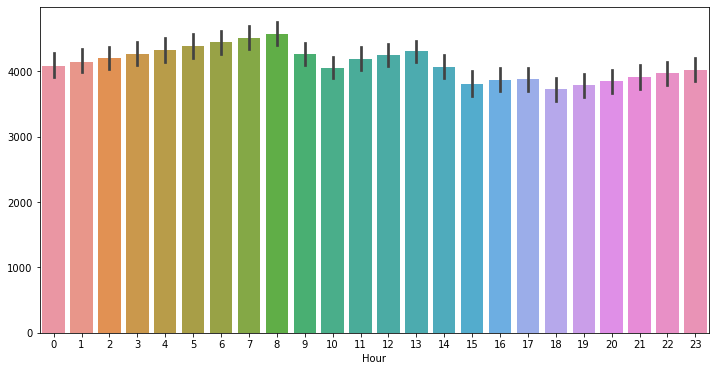

In [12]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Hour", y = v_df.Hour.index, data = v_df);

#### Her saat için birbirine yakın örnek var ve bu durum modelimizin doğru tahmini için önemli.

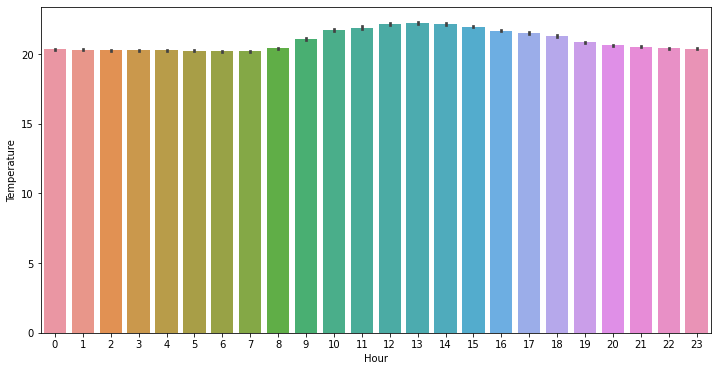

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Hour", y = "Temperature", data = v_df);

#### Saatlere göre Sıcaklık değerlerine baktığımızda Sıcaklık sabah 7 ile akşam 7 arasında hareketlilik söz konusu.

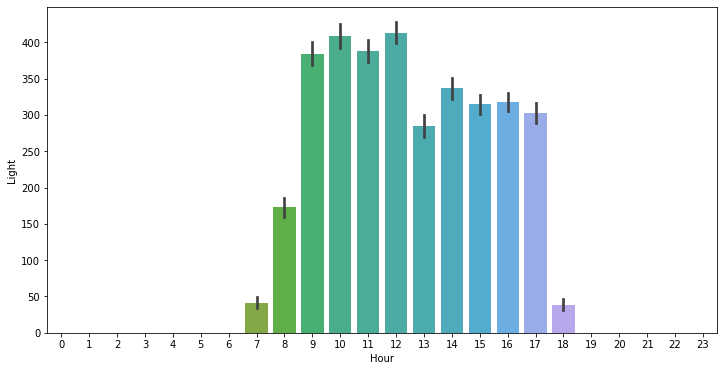

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Hour", y = "Light", data = v_df);

#### Saatlere göre Işık değerlerine baktığımızda tahmin edildiği gibi sabah 7 ile akşam 7 arasında ışık değerlerinin değiştiği gözüküyor ve en yoğun olduğu saatler gündüz vakti olduğu görülüyor.

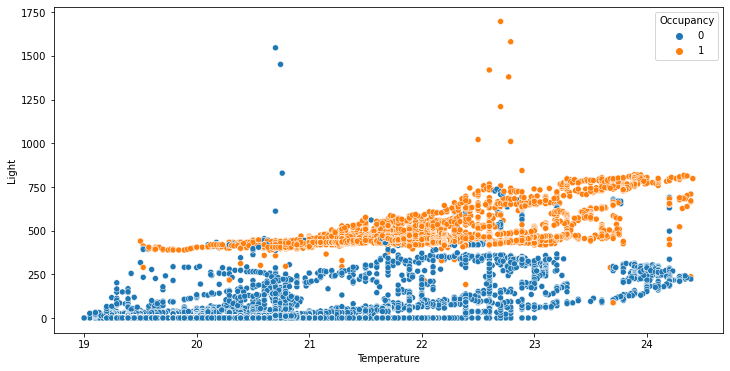

In [15]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Temperature", y = "Light",hue = "Occupancy", data = v_df);

#### Grafikte 0 durumu yani insan yok iken olduğu durum için Light değişkeni düşük iken, 1 durumu yani insan varlığı olduğu durum için Light değişkeni yükselmekte.

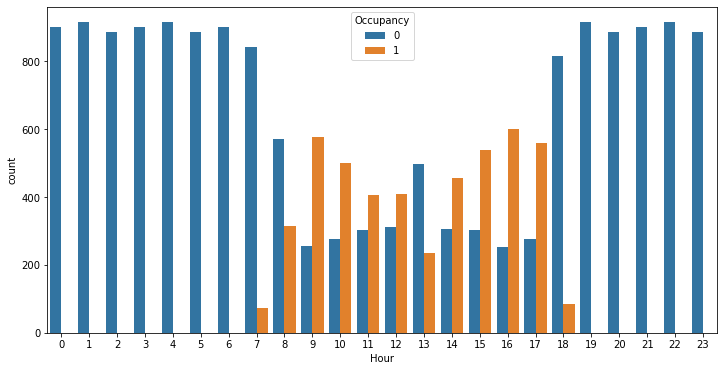

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Hour", hue = "Occupancy", data = v_df);

#### Grafiğe göre geceleri insan varlığı olmadığı görünüyor.

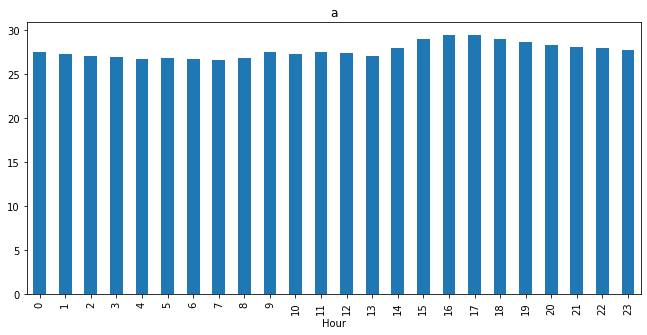

In [17]:
# Nem değerleri
plt.figure(figsize = (11,5))
a = v_df.groupby("Hour")["Humidity"].mean()
a.plot(kind="bar", title = "a");

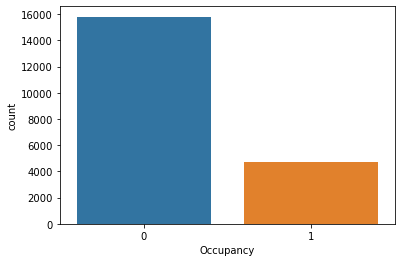

In [18]:
sns.countplot(data = v_df, x = "Occupancy"); 

#### Grafikte veri setinin 0 yani insan varlığının olmadığı durum ağırlıklı olduğu görünüyor.

In [19]:
df.keys()

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'Hour', 'CO2THumidity'],
      dtype='object')

#### Train-Test ayrımı : Train verimiz df1 ve df2 verisetlerinden oluşuyor 
#### ------------------- : Test verimiz df3 verisetinden oluşuyor.

In [20]:
X = df.drop(["date", "Occupancy"], axis = 1).values
y = df["Occupancy"].values

# Train-test split
X_train = X
y_train = y
X_test = df3.drop(["date", "Occupancy"], axis = 1).values
y_test = df3["Occupancy"].values

#### DecisionTree ile Model Eğitimi ve Model'in Accuracy Score'u

In [21]:
model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

# Test 
y_pred = model.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9830803937653815

#### Random Forest ile Model Eğitimi ve Model'in Accuracy Score'u

In [22]:
model = RandomForestClassifier(max_depth=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9837981952420016

#### AdaBoost ile Model Eğitimi ve Model'in Accuracy Score'u

In [23]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9676989335520919

#### Xgboost ile Model Eğitimi ve Model'in Accuracy Score'u

In [24]:
model = xgb.XGBClassifier(eval_metric = "logloss", use_label_encoder = False)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9710828547990156

#### Gradient Boosting ile Model Eğitimi ve Model'in Accuracy Score'u

In [25]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9873872026251025

#### GridSearchCV ile GradientBoosting algoritması için Hyperparameter Tuning yani en iyi parametrelerin bulunması.

In [26]:
params_gb = {"max_depth" : [1, 2, 5, 10],
             "max_features" : [0.4, 0.8],
             "learning_rate" : [0.01, 0.03, 0.1],
             "n_estimators" : [50, 100, 200],
             "subsample" : [0.8]}

gbc = GradientBoostingClassifier()
grid_gb = GridSearchCV(estimator = gbc, param_grid = params_gb, scoring = "accuracy", cv = 5, n_jobs = -1,verbose = 2)
grid_gb.fit(X_train, y_train)
grid_gb.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.4,
 'n_estimators': 50,
 'subsample': 0.8}

In [27]:
best_model = grid_gb.best_estimator_
best_model.score(X_test, y_test)

0.9928219852337982

#### Kontrol amaçlı verilen parametrelerle final modelin oluşturulması ve score'u

In [28]:
final_model = GradientBoostingClassifier(learning_rate= 0.03,
                                     max_depth= 1,
                                     max_features= 0.4,
                                     n_estimators= 200,
                                     subsample= 0.8)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
final_model.score(X_test, y_test)

0.993129614438064

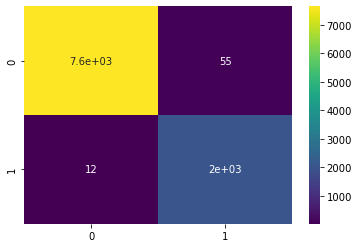

In [29]:
# Confusion Matrix 
cnfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cnfm, annot=True, cmap="viridis");

#### Modelin Confusion Matrixine baktığımızda 55 + 12 toplamda 67 adet hatalı tahmin olduğu görülüyor. 

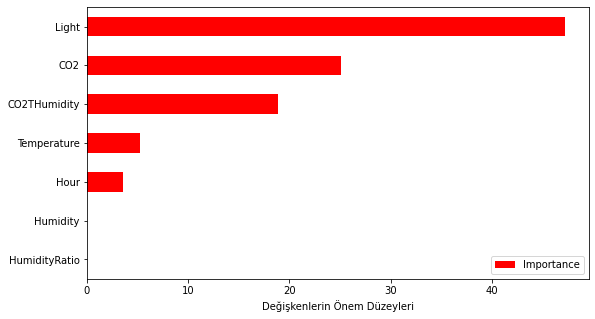

In [31]:
Importance = pd.DataFrame({"Importance": final_model.feature_importances_*100},
                         index = df.drop(["date", "Occupancy"], axis = 1).columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind= "barh",
                                                                          color = "r", figsize=(9,5))
plt.xlabel("Değişkenlerin Önem Düzeyleri")
plt.legend(loc='lower right');

### Grafikte modelimiz için en değerli parametrenin "Light" parametresi olduğu görülüyor.
### En önemsiz parametre ise Humidity